In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Titanic_Dataset_for_Data_analysis.csv')

In [6]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [11]:
print(df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  Fals

In [12]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [13]:
df['Fare'].fillna(df['Fare'].median(), inplace = True)

In [14]:
df.drop(columns='Cabin', inplace=True)

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
df['Sex'] = df['Sex'].map({'male':0, 'female': 1})

In [20]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

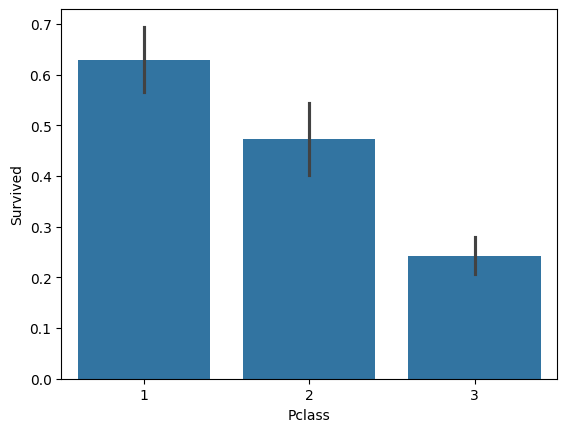

In [21]:
sns.barplot(x='Pclass', y='Survived', data = df)

Text(0.5, 1.0, 'Survival Rate by PAssenge Class')

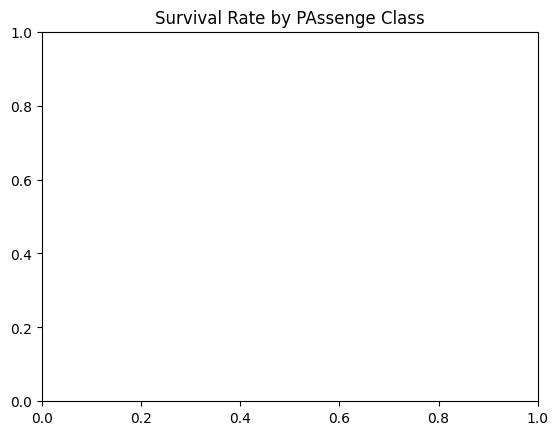

In [22]:
plt.title('Survival Rate by PAssenge Class')

In [23]:
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

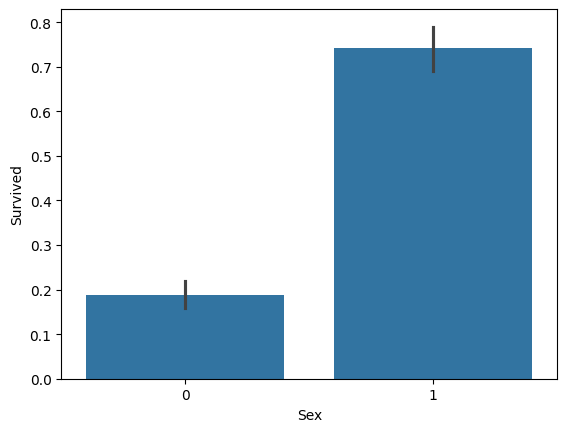

In [24]:
sns.barplot(x='Sex', y='Survived', data = df)

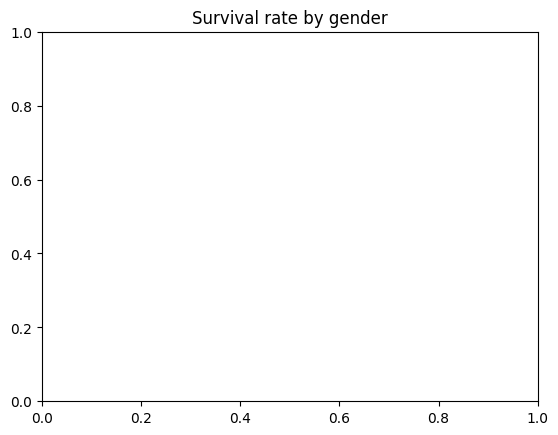

In [25]:
plt.title('Survival rate by gender')
plt.show()

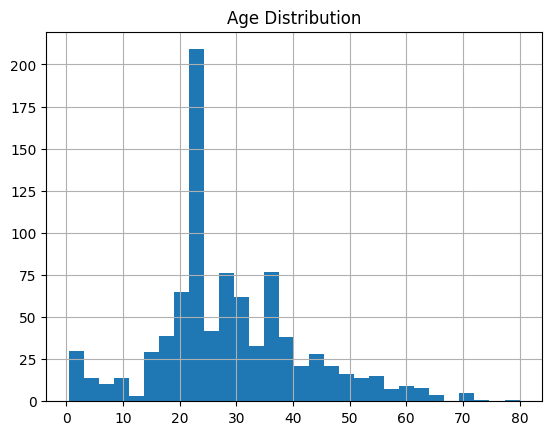

In [26]:
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.show()

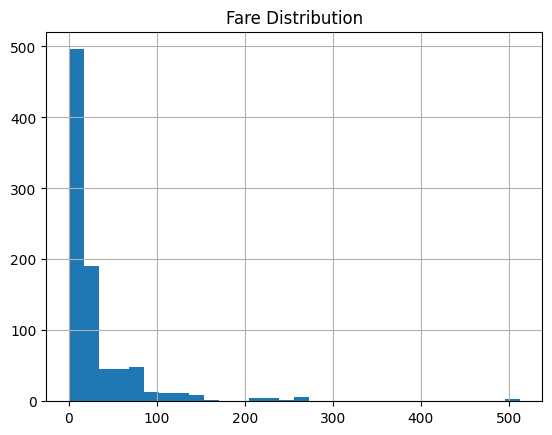

In [27]:
df['Fare'].hist(bins = 30)
plt.title('Fare Distribution')
plt.show()

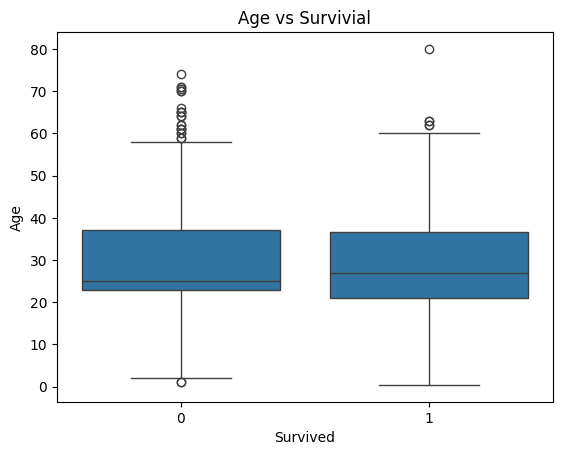

In [28]:
sns.boxplot(x='Survived', y='Age', data = df)
plt.title('Age vs Survivial')
plt.show()

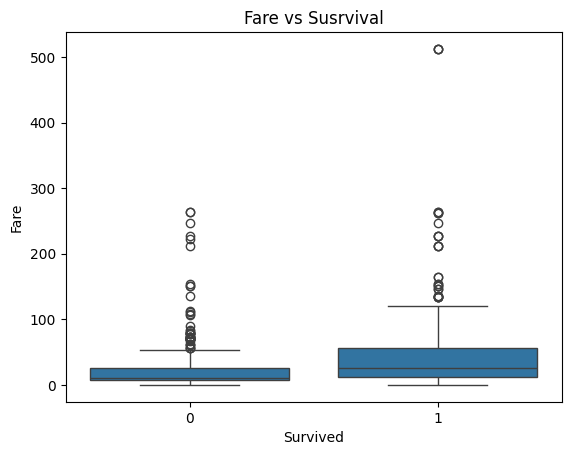

In [30]:
sns.boxplot(x='Survived', y='Fare', data = df)
plt.title('Fare vs Susrvival')
plt.show()

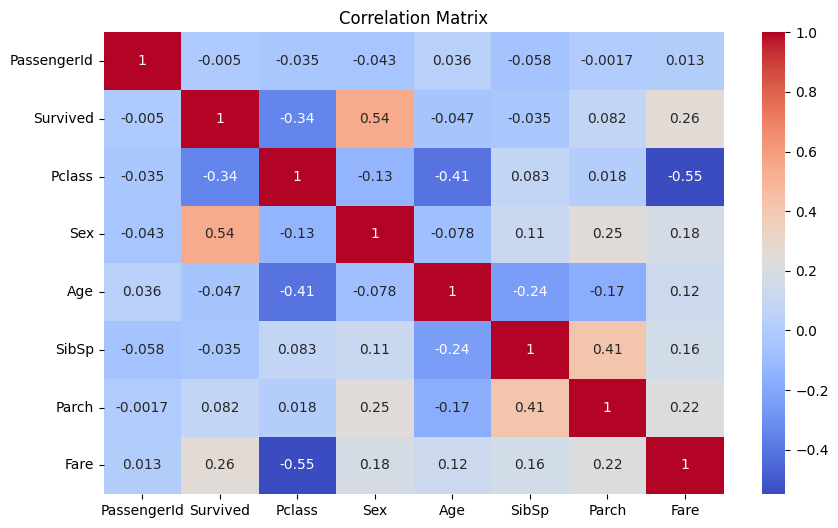

In [33]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize = (10, 6))
sns.heatmap(numeric_df.corr(), annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

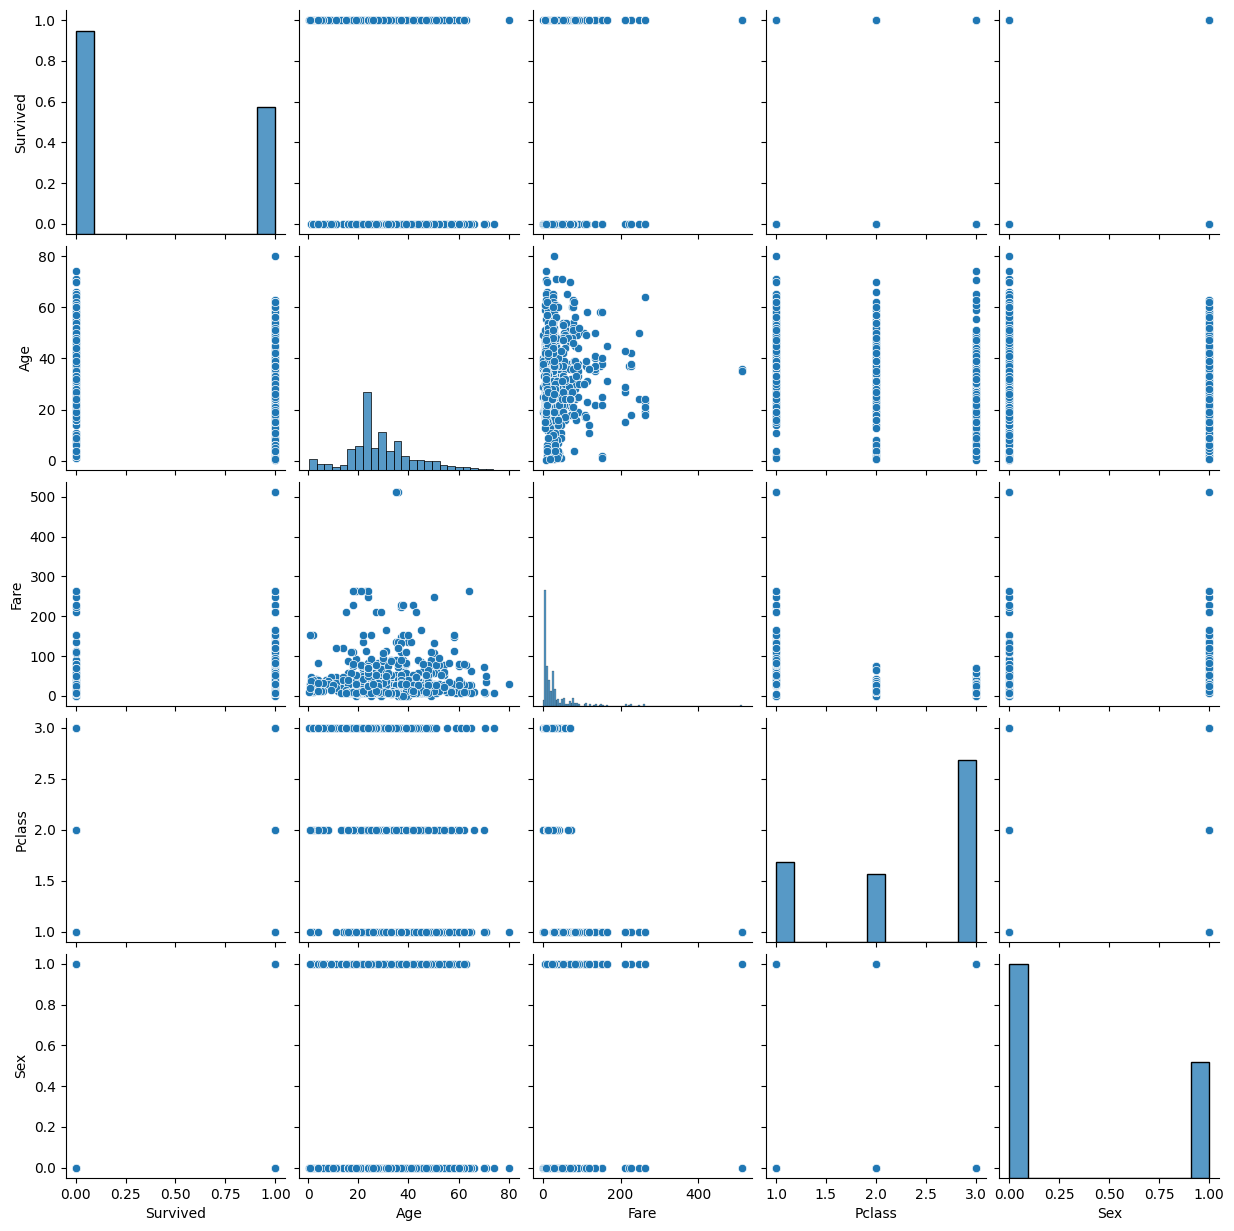

In [36]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']])
plt.show()

In [37]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [38]:
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

In [40]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

In [42]:
df['FareCategory'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [43]:
print(df.groupby('Sex')['Survived'].mean())

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


In [44]:
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


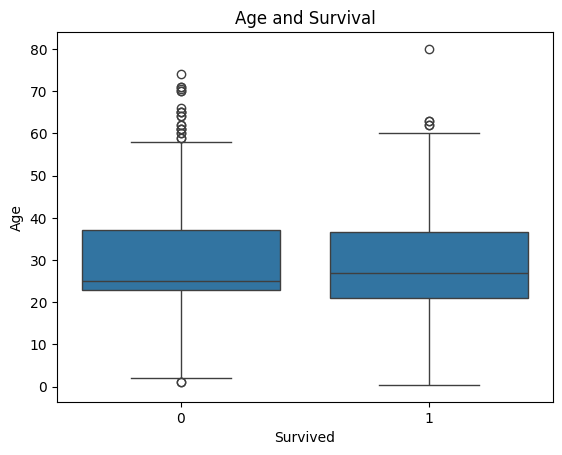

In [46]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age and Survival')
plt.show()

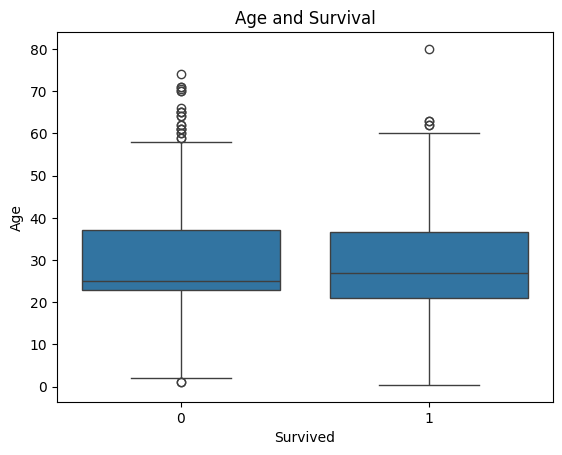

In [47]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age and Survival')
plt.show()

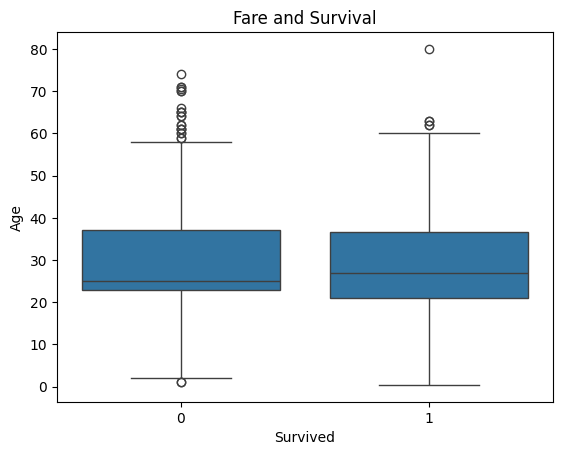

In [49]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Fare and Survival')
plt.show()

In [51]:
#calculate statistical metrics
age_stats = df['Age'].agg(['mean', 'median', 'std'])
fare_stats= df['Fare'].agg(['mean', 'median', 'std'])
print("Age Stats:", age_stats)
print("Fare Stats:", fare_stats)

Age Stats: mean      29.066409
median    26.000000
std       13.244532
Name: Age, dtype: float64
Fare Stats: mean      32.204208
median    14.454200
std       49.693429
Name: Fare, dtype: float64


In [55]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test between Pclass and Survived")
print(f"Chi2: {chi2}, p-value: {p}")


Chi-square test between Pclass and Survived
Chi2: 102.88898875696056, p-value: 4.549251711298793e-23


In [56]:
#7. conclusion and reporting
print("Key Takeaways:")
print("1. Women had a significantly higher survival rate than men.")
print("2. Passengers in higher classes(Pclass 1) had better chances of a survivial.")
print("3. Younger passengers, particularly children, were more likely to survive.")
print("4. Higher fare prices were associated with a better survival rate.")

Key Takeaways:
1. Women had a significantly higher survival rate than men.
2. Passengers in higher classes(Pclass 1) had better chances of a survivial.
3. Younger passengers, particularly children, were more likely to survive.
4. Higher fare prices were associated with a better survival rate.
